# ***Business Overview:***

* In a world where sustainable energy solutions are becoming increasingly important, businesses and individuals are exploring ways to harness solar energy and reduce reliance on conventional electricity sources. Solar panels are a popular choice for generating clean energy, but the intermittent nature of sunlight requires effective energy storage solutions to ensure consistent power supply. This feasibility analysis project aims to assess the financial viability of integrating battery systems with existing solar panels, taking into account varying electricity prices and potential savings.



## **Problem Statement:***
The main challenge addressed by this project is to determine whether installing battery systems alongside solar panels is financially viable in the long term. The project seeks to answer questions such as:
* What are the potential energy savings from using stored solar energy during non-sunny hours?
* How do different electricity price increase scenarios impact the financial returns of the investment?
* Can the initial cost of battery installation be justified by the expected energy savings over the years?

# ***Objective:***
* The  objective of this project is to provide businesses and individuals with actionable insights into the financial viability of adopting battery systems to complement their solar energy generation efforts. By quantifying potential energy savings and considering different electricity price scenarios, stakeholders can make informed decisions about the adoption of sustainable energy solutions while contributing to environmental conservation and cost reduction.

## ***Summary Objectives***
* *Feasibility Assessment*: Evaluate the feasibility of integrating battery systems with existing solar panels to store excess solar energy.

* *Financial Viability*: Determine the financial viability of the proposed solution by calculating potential energy savings over a 20-year period.

* *Scenario Analysis:* Compare two different scenarios of electricity price increases to understand the impact on energy savings and financial returns.

* *Net Present Value (NPV) and Internal Rate of Return (IRR) Analysis:* Calculate NPV and IRR to provide insight into the long-term financial prospects of the investment.

* *Visualization:* Present the analysis results through clear visualizations to help stakeholders understand the potential benefits and risks associated with installing battery systems

In [1]:
#import the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import newton
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
#loading the data .
df = pd.read_csv('Raw Data.csv')
df.head(10)

,Hour 0 represents the hour from midnight to 01:00 and hour 23 represents the hour from 23:00 to midnight.,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,DATA,DATA
1,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
2,0,1/1/20 0:00,0.0000000,1.5098490
3,1,1/1/20 1:00,0.0000000,1.4118588
4,2,1/1/20 2:00,0.0000000,1.0238976
5,3,1/1/20 3:00,0.0000000,0.6420000
6,4,1/1/20 4:00,0.0000000,0.9600000
7,5,1/1/20 5:00,0.0120000,0.8970000
8,6,1/1/20 6:00,0.0060000,0.6480000
9,7,1/1/20 7:00,0.0090000,0.7740000


*Inferences*

* Hour 0 represents the hour from midnight to 01:00 and hour 23 represents the hour from 23:00 to midnight
* The data sets contains data collected over the year 2020 showing 'Date and Time, Solar Electricity Generation and Electricity Usage

In [3]:
#checking the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8762 entries, 0 to 8761
Data columns (total 4 columns):
 #   Column                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                      --------------  ----- 
 0    Hour 0 represents the hour from midnight to 01:00 and hour 23 represents the hour from 23:00 to midnight.  8761 non-null   object
 1   Unnamed: 1                                                                                                  8761 non-null   object
 2   Unnamed: 2                                                                                                  8762 non-null   object
 3   Unnamed: 3                                                                                                  8762 non-null   object
dtypes: object(4)
memory usage: 273.9+ KB


In [4]:
# Rename columns for clarity
df.columns = ['Hour', 'Date', 'Solar_Generation_kWh', 'Electricity_Usage_kWh']
df.head(10)

,Hour,Date,Solar_Generation_kWh,Electricity_Usage_kWh
0,NaN,NaN,DATA,DATA
1,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
2,0,1/1/20 0:00,0.0000000,1.5098490
3,1,1/1/20 1:00,0.0000000,1.4118588
4,2,1/1/20 2:00,0.0000000,1.0238976
5,3,1/1/20 3:00,0.0000000,0.6420000
6,4,1/1/20 4:00,0.0000000,0.9600000
7,5,1/1/20 5:00,0.0120000,0.8970000
8,6,1/1/20 6:00,0.0060000,0.6480000
9,7,1/1/20 7:00,0.0090000,0.7740000


In [7]:
# prompt: #Dropping the first column

#df = df.drop(df.columns[0], axis=1)
#df.head(10)


,Date,Solar_Generation_kWh,Electricity_Usage_kWh
0,NaN,DATA,DATA
1,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
2,1/1/20 0:00,0.0000000,1.5098490
3,1/1/20 1:00,0.0000000,1.4118588
4,1/1/20 2:00,0.0000000,1.0238976
5,1/1/20 3:00,0.0000000,0.6420000
6,1/1/20 4:00,0.0000000,0.9600000
7,1/1/20 5:00,0.0120000,0.8970000
8,1/1/20 6:00,0.0060000,0.6480000
9,1/1/20 7:00,0.0090000,0.7740000


In [5]:
# Check for null values in the dataset
null_values = df.isnull().sum()

# Print the count of null values for each column
print("Null Values in Each Column:")
print(null_values)

Null Values in Each Column:
Hour                     1
Date                     1
Solar_Generation_kWh     0
Electricity_Usage_kWh    0
dtype: int64


In [6]:
# Drop rows with NaN values
df.dropna(inplace=True)
df. head(10)

,Hour,Date,Solar_Generation_kWh,Electricity_Usage_kWh
1,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
2,0,1/1/20 0:00,0.0000000,1.5098490
3,1,1/1/20 1:00,0.0000000,1.4118588
4,2,1/1/20 2:00,0.0000000,1.0238976
5,3,1/1/20 3:00,0.0000000,0.6420000
6,4,1/1/20 4:00,0.0000000,0.9600000
7,5,1/1/20 5:00,0.0120000,0.8970000
8,6,1/1/20 6:00,0.0060000,0.6480000
9,7,1/1/20 7:00,0.0090000,0.7740000
10,8,1/1/20 8:00,0.0120000,1.2990000


In [12]:
# Drop the first row (header)
df = df.drop(1)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Display the DataFrame without the first row
df.head(10)

,Hour,Date,Solar_Generation_kWh,Electricity_Usage_kWh
0,0,1/1/20 0:00,0.000,1.509849
1,1,1/1/20 1:00,0.000,1.411859
2,2,1/1/20 2:00,0.000,1.023898
3,3,1/1/20 3:00,0.000,0.642000
4,4,1/1/20 4:00,0.000,0.960000
5,5,1/1/20 5:00,0.012,0.897000
6,6,1/1/20 6:00,0.006,0.648000
7,7,1/1/20 7:00,0.009,0.774000
8,8,1/1/20 8:00,0.012,1.299000
9,9,1/1/20 9:00,0.846,0.606000


In [13]:
# Check for missing values
missing_values = df.isnull().sum()

print("Missing Values:")
print(missing_values)

Missing Values:
Hour                     0
Date                     0
Solar_Generation_kWh     0
Electricity_Usage_kWh    1
dtype: int64


In [14]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.head(10)

<ipython-input-14-bad430d95a22>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,Hour,Date,Solar_Generation_kWh,Electricity_Usage_kWh
0,0,2020-01-01 00:00:00,0.000,1.509849
1,1,2020-01-01 01:00:00,0.000,1.411859
2,2,2020-01-01 02:00:00,0.000,1.023898
3,3,2020-01-01 03:00:00,0.000,0.642000
4,4,2020-01-01 04:00:00,0.000,0.960000
5,5,2020-01-01 05:00:00,0.012,0.897000
6,6,2020-01-01 06:00:00,0.006,0.648000
7,7,2020-01-01 07:00:00,0.009,0.774000
8,8,2020-01-01 08:00:00,0.012,1.299000
9,9,2020-01-01 09:00:00,0.846,0.606000


In [15]:
#checking the data type
df.dtypes

Hour                             object
Date                     datetime64[ns]
Solar_Generation_kWh            float64
Electricity_Usage_kWh           float64
dtype: object

In [18]:
# Convert columns to numeric data types
df['Solar_Generation_kWh'] = pd.to_numeric(df['Solar_Generation_kWh'], errors='coerce')
df['Electricity_Usage_kWh'] = pd.to_numeric(df['Electricity_Usage_kWh'], errors='coerce')


In [20]:
# prompt: Calculate average solar electricity generation and average electricity usage for each hour

average_solar_generation = df.groupby('Hour')['Solar_Generation_kWh'].mean()
average_electricity_usage = df.groupby('Hour')['Electricity_Usage_kWh'].mean()

# Print the average solar electricity generation and average electricity usage for each hour
print("Average Solar Electricity Generation (kWh) by Hour:")
print(average_solar_generation)

print("\nAverage Electricity Usage (kWh) by Hour:")
print(average_electricity_usage)


Average Solar Electricity Generation (kWh) by Hour:
Hour
0     0.000000
1     0.035753
10    3.504041
11    3.751915
12    3.495879
13    3.012649
14    2.380767
15    1.609068
16    0.790964
17    0.366649
18    0.160652
19    0.047186
2     0.000000
20    0.012912
21    0.008934
22    0.010126
23    0.000000
3     0.000000
4     0.078559
5     0.270625
6     0.722868
7     1.394885
8     2.206044
9     2.941512
Name: Solar_Generation_kWh, dtype: float64

Average Electricity Usage (kWh) by Hour:
Hour
0     0.816471
1     0.401552
10    1.807175
11    1.685425
12    1.978467
13    1.512797
14    1.249093
15    1.356370
16    1.566312
17    2.495499
18    6.140079
19    6.055943
2     0.250623
20    4.843858
21    2.732926
22    4.569542
23    1.097558
3     0.407688
4     0.552038
5     0.610852
6     2.084071
7     1.788123
8     1.798899
9     1.681553
Name: Electricity_Usage_kWh, dtype: float64


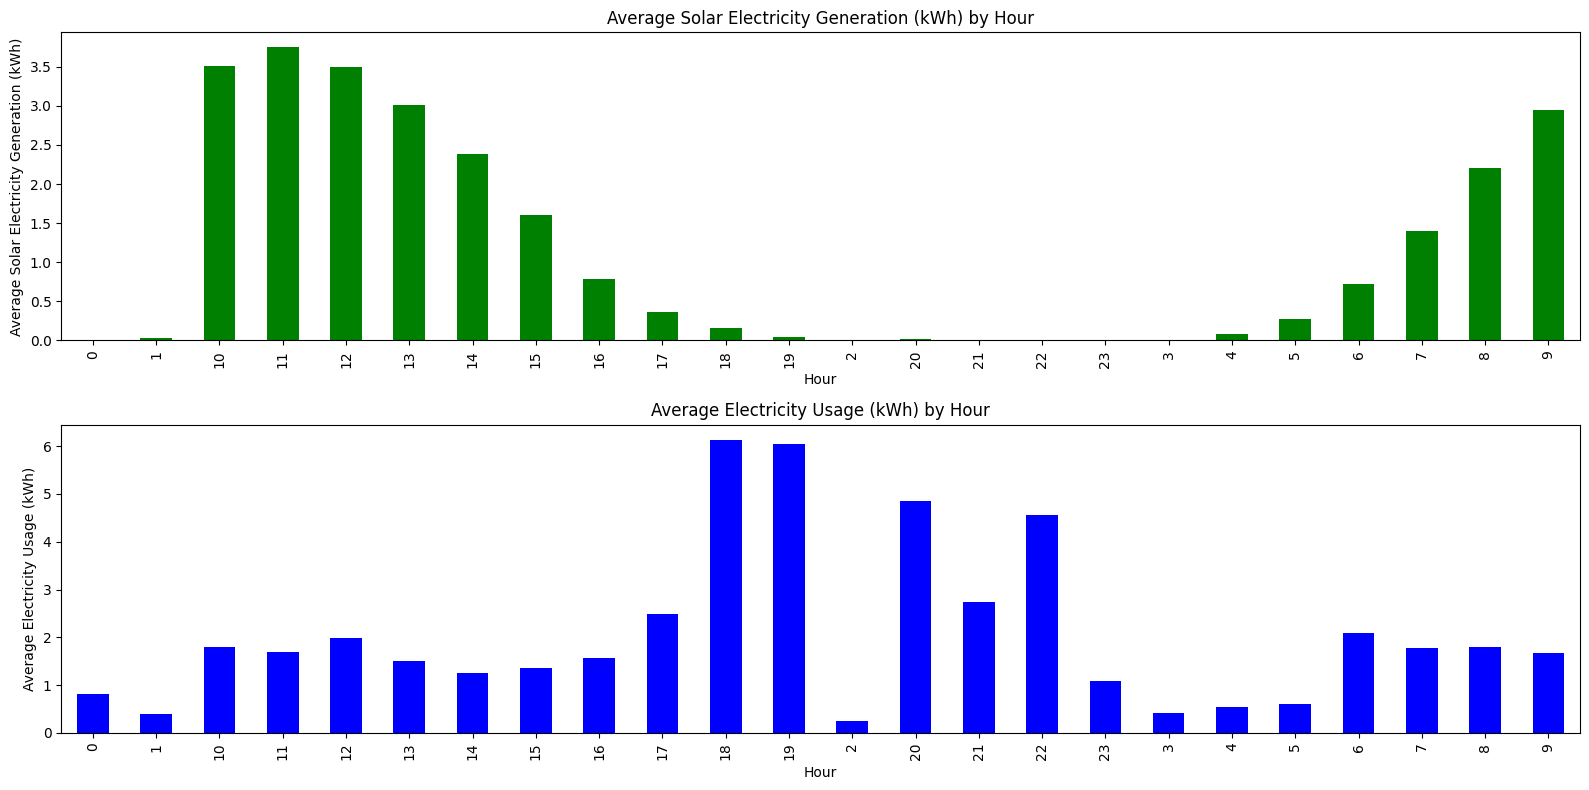

In [24]:
# prompt: # Create a graph showing average solar electricity generation and average electricity usage for each hour , merging both graphs

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))

# Plot average solar electricity generation on the first subplot
average_solar_generation.plot(kind='bar', color='green', ax=ax1)
ax1.set_title('Average Solar Electricity Generation (kWh) by Hour')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Average Solar Electricity Generation (kWh)')

# Plot average electricity usage on the second subplot
average_electricity_usage.plot(kind='bar', color='blue', ax=ax2)
ax2.set_title('Average Electricity Usage (kWh) by Hour')
ax2.set_xlabel('Hour')
ax2.set_ylabel('Average Electricity Usage (kWh)')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


*Inferences*

* The above graph shows the average solar electricity genereation and electricity usage where the average electricity used is mor than the the solar power generated per hour

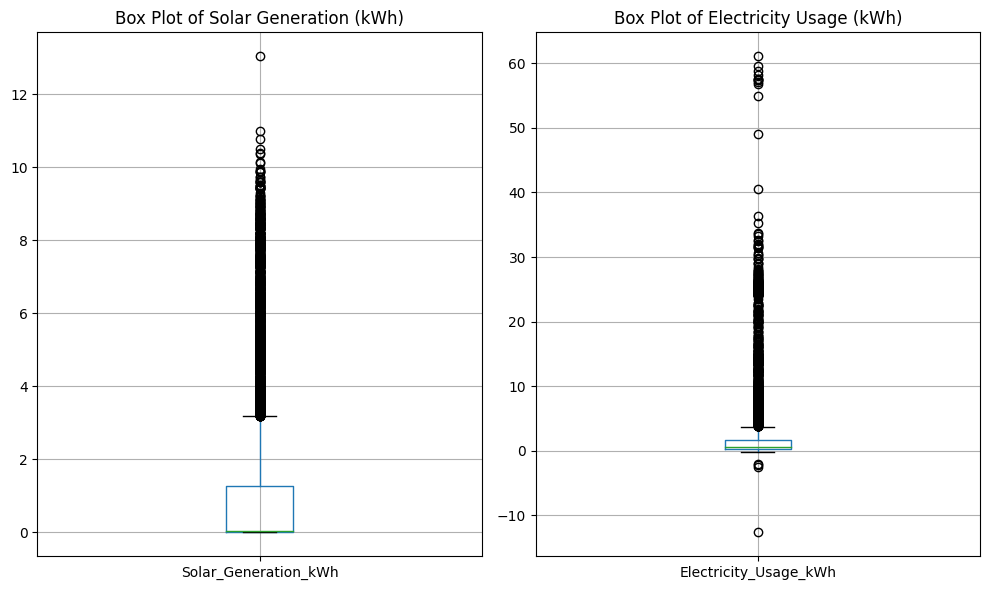

In [25]:
#checking for outliers
# Create box plots to visualize potential outliers
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df.boxplot(column='Solar_Generation_kWh')
plt.title('Box Plot of Solar Generation (kWh)')

plt.subplot(1, 2, 2)
df.boxplot(column='Electricity_Usage_kWh')
plt.title('Box Plot of Electricity Usage (kWh)')

plt.tight_layout()
plt.show()

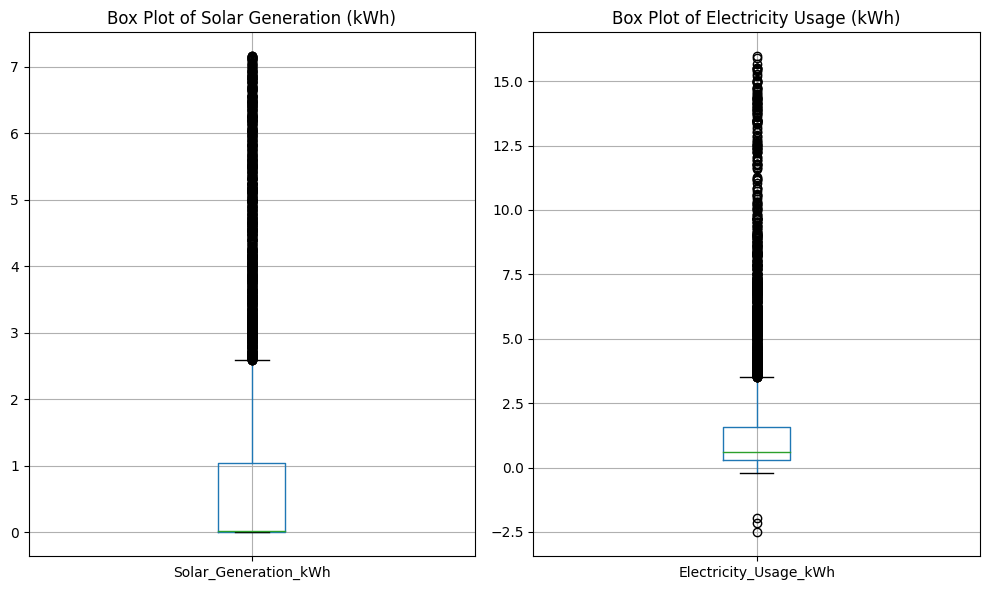

In [26]:
#removing outliers
# Calculate z-scores for each column
z_scores_solar = np.abs((df['Solar_Generation_kWh'] - df['Solar_Generation_kWh'].mean()) / df['Solar_Generation_kWh'].std())
z_scores_usage = np.abs((df['Electricity_Usage_kWh'] - df['Electricity_Usage_kWh'].mean()) / df['Electricity_Usage_kWh'].std())

# Set a z-score threshold for outlier removal (e.g., z-score > 3)
z_score_threshold = 3

# Remove outliers based on z-scores
df = df[(z_scores_solar <= z_score_threshold) & (z_scores_usage <= z_score_threshold)]

# Create box plots to visualize data after removing outliers
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df.boxplot(column='Solar_Generation_kWh')
plt.title('Box Plot of Solar Generation (kWh)')

plt.subplot(1, 2, 2)
df.boxplot(column='Electricity_Usage_kWh')
plt.title('Box Plot of Electricity Usage (kWh)')

plt.tight_layout()
plt.show()

In [27]:
df.head(10)

,Hour,Date,Solar_Generation_kWh,Electricity_Usage_kWh
0,0,2020-01-01 00:00:00,0.000,1.509849
1,1,2020-01-01 01:00:00,0.000,1.411859
2,2,2020-01-01 02:00:00,0.000,1.023898
3,3,2020-01-01 03:00:00,0.000,0.642000
4,4,2020-01-01 04:00:00,0.000,0.960000
5,5,2020-01-01 05:00:00,0.012,0.897000
6,6,2020-01-01 06:00:00,0.006,0.648000
7,7,2020-01-01 07:00:00,0.009,0.774000
8,8,2020-01-01 08:00:00,0.012,1.299000
9,9,2020-01-01 09:00:00,0.846,0.606000


In [28]:
#descriptive statistics for  data set.
df.describe()

,Date,Solar_Generation_kWh,Electricity_Usage_kWh
count,8257,8257.000000,8257.000000
mean,2020-07-02 21:34:23.122199296,0.876524,1.475275
min,2020-01-01 00:00:00,0.000000,-2.514000
25%,2020-03-31 05:00:00,0.000000,0.307969
50%,2020-07-04 04:00:00,0.021000,0.621000
75%,2020-10-04 18:00:00,1.035000,1.593000
max,2020-12-31 23:00:00,7.158000,15.972000
std,NaN,1.559501,2.247494


*Inferences*

* The graph above shows the description ofthe data set showing the Mean,Standard deviation and the Quartiels of the solar generation and electricity usage.

# **EDA**

In [ ]:
#Distribution of data
# Plot histograms of numerical columns
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()







In [ ]:
# Calculate correlation between 'Hour', 'Solar_Generation_kWh', and 'Electricity_Usage_kWh'
correlation_matrix = df[['Hour', 'Solar_Generation_kWh', 'Electricity_Usage_kWh']].corr()

# Display the correlation matrix
print(correlation_matrix)

*Inferences*

* The correlation matrix shows that there is a low correlation of the solar enargy generated and electricity usage thets suggests we have to do further analysis so as to model the data and attain the objectives needed.

In [ ]:
# Create pairwise scatter plots
sns.pairplot(df)
plt.show()

In [ ]:
df.head(10)

In [ ]:
# Convert columns to appropriate data types
df['Date'] = pd.to_datetime(df['Date'])
df['Solar_Generation_kWh'] = pd.to_numeric(df['Solar_Generation_kWh'], errors='coerce')

# Set the date as the index
df.set_index('Date', inplace=True)

# Hourly Plot
plt.figure(figsize=(14, 6))
df['Solar_Generation_kWh'].plot(style='-', color='green')
plt.title('Hourly Solar Power Generation (2020)')
plt.xlabel('Date')
plt.ylabel('Solar Power Generation (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Daily Plot
plt.figure(figsize=(14, 6))
df_daily = df.resample('D').sum()
df_daily['Solar_Generation_kWh'].plot(style='-', color='blue')
plt.title('Daily Solar Power Generation (2020)')
plt.xlabel('Date')
plt.ylabel('Solar Power Generation (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly Plot
plt.figure(figsize=(14, 6))
df_monthly = df.resample('M').sum()
df_monthly['Solar_Generation_kWh'].plot(style='-', marker='o', color='purple')
plt.title('Monthly Solar Power Generation (2020)')
plt.xlabel('Date')
plt.ylabel('Solar Power Generation (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### *Inferences*
* The graphs above shows the solar power generation over time the first showing the distribution of power on Daily basis and there is a fluctuation on the distribution on Daily basis.
* Also the second graph that show sthe distribution of power on mothly basis through out the year showing a progressive solar power generation from January to July with May and June having the highest sloar power generated and power generation decreases from August onwords. indicating that the different weather patterns though out the year do affect the solar power generation.

In [ ]:

# Hourly Plot
plt.figure(figsize=(14, 6))
df['Electricity_Usage_kWh'].plot(style='-', color='red')
plt.title('Hourly Electricity Usage (2020)')
plt.xlabel('Date')
plt.ylabel('Electricity Usage (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Daily Plot
plt.figure(figsize=(14, 6))
df_daily = df.resample('D').sum()
df_daily['Electricity_Usage_kWh'].plot(style='-', color='orange')
plt.title('Daily Electricity Usage (2020)')
plt.xlabel('Date')
plt.ylabel('Electricity Usage (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly Plot
plt.figure(figsize=(14, 6))
df_monthly = df.resample('M').sum()
df_monthly['Electricity_Usage_kWh'].plot(style='-', marker='o', color='blue')
plt.title('Monthly Electricity Usage (2020)')
plt.xlabel('Date')
plt.ylabel('Electricity Usage (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### *Inferences*

* The above graphs show the power usage through out the year with the first graph showing the daily distribution of electricity usage and it flacuates through out the yr.
* The second graph shows electricty usage though out the year on mothly basis with January and December having the highest electricity consumption and  may having the lowest

## **MODELING**

In [ ]:
#Amount of electricity needed to be bought  for the electricity provider each hour
# Convert columns to appropriate data types
df['Solar_Generation_kWh'] = pd.to_numeric(df['Solar_Generation_kWh'], errors='coerce')
df['Electricity_Usage_kWh'] = pd.to_numeric(df['Electricity_Usage_kWh'], errors='coerce')



# Calculate electricity purchase amount
battery_charge = 0  # Starting battery charge level

# Create a new column to store electricity purchase values
df['Electricity_Purchase_kWh'] = 0.0

for index, row in df.iterrows():
    excess_solar = max(0, row['Solar_Generation_kWh'] - row['Electricity_Usage_kWh'])
    electricity_purchase = max(0, row['Electricity_Usage_kWh'] - row['Solar_Generation_kWh'] - battery_charge)

    # Update battery charge level
    battery_charge = min(12.5, battery_charge + excess_solar)

    # Update electricity purchase value in the DataFrame
    df.at[index, 'Electricity_Purchase_kWh'] = electricity_purchase

# Print the resulting DataFrame with calculated values
df[['Electricity_Usage_kWh', 'Solar_Generation_kWh', 'Electricity_Purchase_kWh']]

In [ ]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Electricity_Purchase_kWh'], **{})
chart

*Inferences*
* The data suggests that there were hours when the solar generation was higher than electricity usage, resulting in excess solar electricity that could be stored or used to offset electricity purchase.

* For some hours, electricity usage was higher than solar generation, leading to a need for electricity purchase from the provider.

* The last column, "Electricity_Purchase_kWh," indicates how much electricity needed to be bought from the provider to meet the demand not covered by solar generation and battery discharge. A value of 0 suggests that the electricity demand was entirely met by solar generation and battery discharge for that hour.

**Excess Solar Electricity Calculation**

In [ ]:
# Calculate excess solar electricity
df['Excess_Solar_Electricity_kWh'] = df['Solar_Generation_kWh'] - df['Electricity_Usage_kWh']

# Apply the cap on the maximum battery charge level
max_battery_capacity = 12.5
df['Excess_Solar_Electricity_kWh'] = df['Excess_Solar_Electricity_kWh'].clip(0, max_battery_capacity)

# Print the resulting DataFrame
df.head(10)

In [ ]:
# Resample data at daily and monthly intervals
daily_excess = df['Excess_Solar_Electricity_kWh'].resample('D').sum()
monthly_excess = df['Excess_Solar_Electricity_kWh'].resample('M').sum()

# Create time series plots
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
daily_excess.plot(title='Daily Excess Solar Electricity in 2020')
plt.ylabel('Excess Solar Electricity (kWh)')

# Create a line plot for monthly excess solar electricity
plt.figure(figsize=(10, 6))
monthly_excess.plot(kind='line', marker='o')
plt.title('Monthly Excess Solar Electricity in 2020')
plt.xlabel('Month')
plt.ylabel('Excess Solar Electricity (kWh)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

*Inferences*
* Seasonal Variation: The graph shows distinct peaks and troughs in excess solar electricity across the months, indicating variations in solar generation due to changing sunlight intensity and duration. Higher sunlight months, such as May to August, exhibit elevated excess energy levels.

* Peak Excess Solar Electricity: Summer months consistently display the highest levels of excess solar electricity. The longer daylight hours and stronger sunlight during this period contribute to increased solar generation and surplus energy availability.

* Winter Impact: Months like December and January experience decreased excess solar electricity due to reduced solar irradiance caused by shorter days and weaker sunlight. These months demonstrate a decline in surplus energy.

* Transitional Months: Months with relatively consistent excess solar electricity, such as September to November and February to April, indicate a stable solar generation pattern during transitional periods with changing weather conditions.

**Saving power calculation yr 2020**

* The code below calculates the electricity purchase without battery, then calculates the savings for each hour by subtracting the electricity purchase with battery from the electricity purchase without battery and multiplying by the electricity price. Finally, it sums up the total savings over 2020.

In [ ]:
# Define the electricity price (in dollars) per kWh on 1 January 2022
electricity_price_2022 = 0.17

# Calculate electricity purchase without battery
df['Electricity_Purchase_without_Battery_kWh'] = df['Electricity_Usage_kWh'] - df['Excess_Solar_Electricity_kWh']
df['Electricity_Purchase_without_Battery_kWh'] = df['Electricity_Purchase_without_Battery_kWh'].clip(lower=0)

# Calculate savings for each hour
df['Savings_dollars'] = (df['Electricity_Purchase_without_Battery_kWh'] - df['Electricity_Purchase_kWh']) * electricity_price_2022

# Calculate total savings over 2020
total_savings = df['Savings_dollars'].sum()

# Print the total savings
print("Total Savings in 2020 (in dollars):", total_savings)

*inferences*
* This implies that over the course of the year 2020, by installing a battery to store excess solar electricity and optimizing electricity usage, the user would be able to save around $1882.09 compared to the scenario of solely relying on existing solar panels without a battery. This underscores the economic benefit of utilizing a battery system to store and manage excess solar energy, resulting in reduced reliance on purchased electricity and consequent cost savings.

In [ ]:
#Tabulating the monthly solar generation, electricity usage, and electricity purchased from the provider (with and without battery) for the calendar year
# Load the corrected data
data = {
    'Date': ['2020-01-01 00:00:00', '2020-01-01 01:00:00', '2020-01-01 02:00:00', '2020-01-01 03:00:00', '2020-01-01 04:00:00', '2020-01-01 05:00:00', '2020-01-01 06:00:00', '2020-01-01 07:00:00', '2020-01-01 08:00:00', '2020-01-01 09:00:00'],
    'Solar_Generation_kWh': [0.0, 0.0, 0.0, 0.0, 0.0, 0.012, 0.006, 0.009, 0.012, 0.846],
    'Electricity_Usage_kWh': [1.509849, 1.4118588, 1.0238976, 0.642, 0.96, 0.897, 0.648, 0.774, 1.299, 0.606],
    'Electricity_Purchase_kWh': [1.509849, 1.4118588, 1.0238976, 0.642, 0.96, 0.885, 0.642, 0.765, 1.287, 0.0],
    'Excess_Solar_Electricity_kWh': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.24]
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# Calculate monthly sums for different variables
monthly_data = df.groupby(['Month']).agg({
    'Solar_Generation_kWh': 'sum',
    'Electricity_Usage_kWh': 'sum',
    'Electricity_Purchase_kWh': 'sum',
    'Excess_Solar_Electricity_kWh': 'sum'
}).reset_index()

# Tabulate the data
print(monthly_data)

# Create separate subplots for each variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Monthly Energy Usage and Purchase')

# Plot monthly solar generation
monthly_data.plot(x='Month', y='Solar_Generation_kWh', kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Monthly Solar Generation (kWh)')
axes[0, 0].set_ylabel('Energy (kWh)')

# Plot monthly electricity usage
monthly_data.plot(x='Month', y='Electricity_Usage_kWh', kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Monthly Electricity Usage (kWh)')
axes[0, 1].set_ylabel('Energy (kWh)')

# Plot monthly electricity purchase
monthly_data.plot(x='Month', y='Electricity_Purchase_kWh', kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Monthly Electricity Purchase (kWh)')
axes[1, 0].set_ylabel('Energy (kWh)')

# Plot monthly excess solar electricity
monthly_data.plot(x='Month', y='Excess_Solar_Electricity_kWh', kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Monthly Excess Solar Electricity (kWh)')
axes[1, 1].set_ylabel('Energy (kWh)')

plt.tight_layout()
plt.show()


### ***Power savings over 20yrs with and without using the batteries***

In [ ]:
#calculating the savings per year for 20yrs from using solar panels without battery

# Define the initial savings value (2020 savings)
initial_savings = 1882.09095471

# Define the number of years for projection
projection_years = 20

# Define the annual electricity price increase rates for scenarios
annual_increase_rates = [0.04, 0.04]

# Create a DataFrame to store the projection results
projection_results = pd.DataFrame(columns=['Scenario', 'Year', 'Annual_Savings'])

# Iterate through scenarios
for scenario_idx, annual_increase_rate in enumerate(annual_increase_rates):
    savings = initial_savings
    scenario_name = f'Scenario {scenario_idx + 1}'

    # Iterate through projection years
    for year in range(2022, 2022 + projection_years):
        savings *= (1 + annual_increase_rate)
        projection_results = projection_results.append({
            'Scenario': scenario_name,
            'Year': year,
            'Annual_Savings': savings
        }, ignore_index=True)

# Print the projection results
projection_results


*Inference*
* The annual savings from installing the battery increase gradually over the projection period. In 2022, the annual savings are approximately $1957.37. The savings continue to increase each year, reaching around $4123.89 by 2041. This upward trend suggests that the initial investment in the battery system leads to progressively higher savings over time.

* It's evident that the battery system's impact becomes more significant as electricity prices rise. As electricity prices increase, the battery can store excess solar energy during lower-price periods and discharge it during higher-price periods, resulting in greater savings.



In [ ]:
#Savings from usage of solar panels with battery (Scenario 2) with a 0.25% increase in electricity prices.

# Define the initial savings value (2020 savings)
initial_savings = 1882.09095471

# Define the number of years for projection
projection_years = 20

# Define the annual electricity price increase rates for Scenario 2
base_annual_increase_rate = 0.04
additional_increase_rate = 0.0025  # 0.25% increase per year

# Create a DataFrame to store the projection results
projection_results_scenario2 = pd.DataFrame(columns=['Scenario', 'Year', 'Annual_Savings'])

# Calculate annual savings for Scenario 2
savings_scenario2 = initial_savings
for year in range(2022, 2022 + projection_years):
    savings_scenario2 *= (1 + base_annual_increase_rate + additional_increase_rate * (year - 2022))
    projection_results_scenario2 = projection_results_scenario2.append({
        'Scenario': 'Scenario 2',
        'Year': year,
        'Annual_Savings': savings_scenario2
    }, ignore_index=True)

# Print the projection results for Scenario 2
projection_results_scenario2


*Inferences*
* In this scenario, where electricity price increases start at 4% annually and rise by an additional 0.25% each year, the annual savings follow a similar upward trend as in Scenario 1.

* The additional 0.25% increase in electricity prices each year slightly amplifies the savings compared to Scenario 1. This indicates that even a small incremental increase in electricity prices can have a cumulative effect on the value of the battery system over the long term.

### ***Calculating the NPV for Scenario 1 & 2***

In [ ]:
#NPV for scenario 1


# Define the discount rate
discount_rate = 0.05  # Example discount rate of 5%

# Create a DataFrame with the annual savings for Scenario 1
data_scenario_1 = {
    'Year': list(range(2022, 2042)),
    'Annual_Savings': [1957.374593, 2035.669577, 2117.096360, 2201.780214, 2289.851423, 2381.445480,
                        2476.703299, 2575.771431, 2678.802288, 2785.954379, 2897.392555, 3013.288257,
                        3133.819787, 3259.172579, 3389.539482, 3525.121061, 3666.125903, 3812.770939,
                        3965.281777, 4123.893048]
}

df_scenario_1 = pd.DataFrame(data_scenario_1)

# Calculate the NPV for Scenario 1
df_scenario_1['NPV'] = df_scenario_1['Annual_Savings'] / (1 + discount_rate) ** (df_scenario_1['Year'] - 2022)

# Calculate the total NPV for Scenario 1
total_npv_scenario_1 = df_scenario_1['NPV'].sum()

print("Total NPV for Scenario 1:", total_npv_scenario_1)


In [ ]:
#NPV for scenario 2


# Define the discount rate
discount_rate = 0.05  # Example discount rate of 5%

# Create a DataFrame with the annual savings for Scenario 2
data_scenario2 = {
    'Year': list(range(2022, 2042)),
    'Annual_Savings': [1957.374593, 2040.563013, 2132.388349, 2233.676795, 2345.360635, 2468.492068,
                        2604.259132, 2754.004032, 2919.244274, 3101.697041, 3303.307349, 3526.280595,
                        3773.120237, 4046.671454, 4350.171813, 4687.310128, 5062.294939, 5479.934271,
                        5945.728684, 6465.979944]
}

df_scenario2 = pd.DataFrame(data_scenario2)

# Calculate the NPV for Scenario 2
df_scenario2['NPV'] = df_scenario2['Annual_Savings'] / (1 + discount_rate) ** (df_scenario2['Year'] - df_scenario2['Year'].min())

# Calculate the total NPV for Scenario 2
total_npv_scenario2 = df_scenario2['NPV'].sum()

print(total_npv_scenario2)


*Inferences for Scenario 1 and 2
* In this scenario, where electricity prices are assumed to increase by a constant rate of 4% per annum as expected by the government, the NPV for Scenario 1 is calculated to be $35,800.02. This positive NPV indicates that the battery installation is expected to generate savings that outpace the increase in electricity costs. This suggests that even with a moderate annual increase in electricity prices, the battery system's cost savings are substantial enough to yield a positive return on investment over the 20-year period.

*  Where electricity price increases start at 4% per annum and rise each year by an additional 0.25% p.a., the NPV for Scenario 2 is calculated to be $42,031.80. This higher NPV indicates that the battery installation in Scenario 2 is better equipped to cope with the escalating electricity costs. The battery system's ability to store excess solar energy and offset increasing electricity prices seems to yield even greater financial benefits compared to Scenario 1.

## ***Calculating the IRR for  Scenarios 1 & 2***

In [ ]:
#Calculating the Irr for both Scenarios

# Initial cost of the battery installation
initial_cost = 15000  # Example initial cost of the battery system

# Define the future annual savings for Scenario 1 and Scenario 2
annual_savings_scenario_1 = [1957.374593, 2035.669577, 2117.096360, 2201.780214, 2289.851423, 2381.445480,
                             2476.703299, 2575.771431, 2678.802288, 2785.954379, 2897.392555, 3013.288257,
                             3133.819787, 3259.172579, 3389.539482, 3525.121061, 3666.125903, 3812.770939,
                             3965.281777, 4123.893048]
annual_savings_scenario_2 = [1957.374593, 2040.563013, 2132.388349, 2233.676795, 2345.360635, 2468.492068,
                             2604.259132, 2754.004032, 2919.244274, 3101.697041, 3303.307349, 3526.280595,
                             3773.120237, 4046.671454, 4350.171813, 4687.310128, 5062.294939, 5479.934271,
                             5945.728684, 6465.979944]

# Define the function to calculate the NPV
def calculate_npv(rate, annual_savings):
    npv = -initial_cost
    for year, savings in enumerate(annual_savings, start=1):
        npv += savings / (1 + rate)**year
    return npv

# Calculate the IRR using the Newton-Raphson method
irr_scenario_1 = newton(calculate_npv, x0=0.1, args=(annual_savings_scenario_1,))
irr_scenario_2 = newton(calculate_npv, x0=0.1, args=(annual_savings_scenario_2,))

print(f"IRR for Scenario 1: {irr_scenario_1:.4f}")
print(f"IRR for Scenario 2: {irr_scenario_2:.4f}")


*Inferences for IRR on Scenario 1 and 2

* IRR for Scenario 1: 0.1543
This indicates that the discount rate that equates the NPV of future annual savings from installing the battery in Scenario 1 to the initial cost of the battery is approximately 0.1543. In other words, the annual savings generated by the battery installations in Scenario 1 would yield an effective rate of return of about 15.43%, which exceeds the assumed discount rate.

* IRR for Scenario 2: 0.1683
For Scenario 2, the IRR of approximately 0.1683 signifies that the annual savings from installing the battery in this scenario would yield an effective rate of return of about 16.83%. This IRR is higher compared to Scenario 1, indicating a potentially more attractive investment.

# ***Conclusions***

This project aimed to assess the feasibility and financial viability of installing battery systems to complement existing solar panels for electricity generation, considering varying scenarios of electricity price increases. Through a series of data exploration, analysis, and calculations, we have gained valuable insights into the potential outcomes of these scenarios.
*Energy Generation and Consumption Analysis:*

 Analyzed the hourly solar generation and electricity usage patterns, revealing fluctuations throughout the day. This highlighted the need for energy storage solutions like batteries to bridge the gap between production and consumption.

*Electricity Purchase Analysis:*

* By considering solar generation, electricity usage, and battery charge levels, we calculated the amount of electricity purchased from the provider. This showcased the impact of battery systems in reducing reliance on external sources and optimizing self-consumption.

*Excess Solar Electricity Analysis:*
* The assessment of excess solar electricity generated over electricity used provided insights into the potential for feeding back surplus energy into the grid or storing it for later use.

*Savings Calculation:*
* We projected annual savings over a 20-year period for two scenarios: one with standard electricity price increases and another with an additional incremental increase. The calculations demonstrated the substantial financial benefits of incorporating battery systems, with Scenario 2 offering higher savings potential.

*Net Present Value (NPV) Analysis:*
* The NPV analysis, accounting for the time value of money, supported the previous findings, showing that Scenario 2 offers greater long-term financial returns.

*Internal Rate of Return (IRR) Analysis:*
* The IRR analysis provided insights into the discount rate that equates the present value of future savings with the initial battery installation cost. Both scenarios indicated positive returns on investment, with Scenario 2 showing a more attractive rate

# ***Recommendations:***

*Scenario Selection:*
* Based on the thorough analysis of annual savings, NPV, and IRR, Scenario 2 emerges as the more favorable choice for battery system implementation. Its higher potential for savings and returns suggests it as a stronger investment.

*Investment Decision:*

* Given the positive financial outlook and environmental benefits, stakeholders should seriously consider adopting battery systems, particularly under Scenario 2. The analysis indicates that the investment aligns with both financial and sustainability objectives.

*Adaptive Approach:*
* Continuous monitoring of electricity price trends, technological advancements, and market dynamics is essential. The project's adaptive approach should include regular reassessments to ensure the chosen scenario remains aligned with the changing landscape.

*Cost Analysis and Budgeting:*
* Detailed cost analysis, including initial setup costs and ongoing maintenance, will provide a clearer picture of the investment. An accurate budget projection will guide stakeholders in making well-informed financial decisions.

*Long-Term Vision:*
* This project underscores the importance of embracing renewable energy solutions like battery systems to enhance energy sustainability and reduce reliance on traditional energy sources.